## 1

In [1]:
import pandas as pd #importing the library

In [2]:
#reading the dataset in dataframe.
myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/1990.csv", usecols=[16])

In [5]:
myDF.head() #checking all the heading

,Origin
0,CMH
1,CMH
2,CMH
3,CMH
4,CMH


In [3]:
#counting how many for times IND appears in list departure.
myvalue = myDF['Origin'].value_counts()["IND"]

In [4]:
print(myvalue) #printing the result

43826


In [6]:
del(myDF) # using the delfunction so that we do not keep in in the memory while working on the project.

In [7]:
#duplicating the work using myindyflight funtion
def myindyflights (myyear: int) -> int:
    """
    The myindyflights function takes a year as the input, and returns the number of flights departing from Indianapolis airport during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the number of flights departing from Indianapolis airport during that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/" + str(myyear) + ".csv", usecols=[16])
    myvalue = myDF['Origin'].value_counts()["IND"]
    return myvalue

In [8]:
#to check if we get the same result as above or not.
import pandas as pd
myindyflights(1990)

43826

In [9]:
#to get the data for year 1987 to 2008. We need to put 2009 so that we can get all the data till 2008
import pandas as pd
myresults = list(map(myindyflights, range(1987,2009)))

In [10]:
#to print the result of above code
sum(myresults)

796496

<BarContainer object of 22 artists>

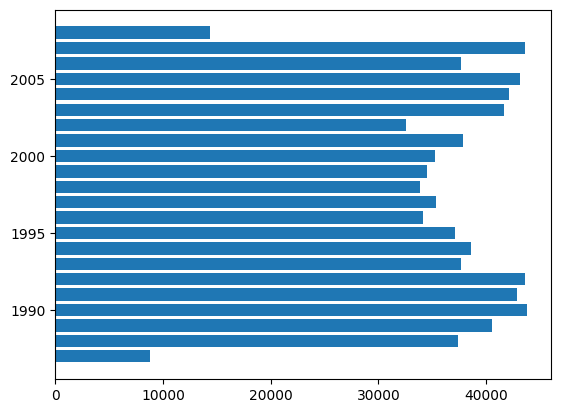

In [11]:
#importing matplotlib to make a graph
import matplotlib.pyplot as plt
plt.barh(range(1987,2009), myresults)

## 2

In [ ]:
#Defining a function to count flights from every airport and reading the dataset.

In [12]:
def myflights (myyear: int) -> int:
    """
    The myflights function takes a year as the input, and returns the number of flights departing from each airport during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the number of flights departing from each airport during that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/" + str(myyear) + ".csv", usecols=[16])
    myvalue = myDF['Origin'].value_counts()
    return myvalue

In [13]:
#importing the library and printing the 1990 flights to crosscheck if it works or not.
import pandas as pd
myflights(1990)

Origin
ATL    269397
ORD    269128
DFW    237924
LAX    169847
PHX    138558
        ...  
YAP       139
RDM       112
GST        86
SUN        66
PSE        61
Name: count, Length: 235, dtype: int64

In [14]:
#using the map function for each year from 1987 to 2008
import pandas as pd
myresults = list(map(myflights, range(1987,2009)))

In [15]:
#now, we need to concatenate all the years into one dataframe where each one is corresponds to different year.
pd.concat(myresults, axis=1).sum(axis=1)

Origin
ORD    6365070.0
ATL    5823454.0
DFW    5522740.0
LAX    3946884.0
DEN    3156846.0
         ...    
GLH          2.0
MKC          1.0
GCC         95.0
MKG         65.0
RKS         63.0
Length: 346, dtype: float64

<BarContainer object of 10 artists>

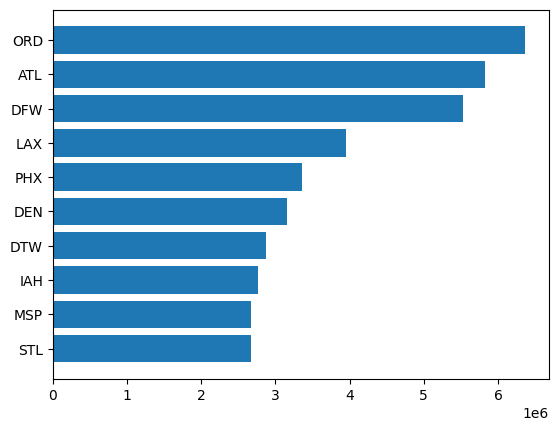

In [16]:
#to get the result in mycounts for top 10 airports

mycounts = pd.concat(myresults, axis=1).sum(axis=1).sort_values().tail(10)
#importing matplot lib to plot the graph
import matplotlib.pyplot as plt
plt.barh(mycounts.index, mycounts)

## 3

In [1]:
import pandas as pd #importing library

In [2]:
#using myindydonations so that it will take year as imput & return the total donation amount.

def myindydonations (myyear: int) -> int:
    """
    The myindydonations function takes a year as the input, and returns the amount of money donated from Indiana during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the amount of money donated from Indiana during that year.
    """
    #reading the file and specific column from it.
    myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont" + str(myyear) + ".txt", header=None, sep='|', usecols=[9,14], encoding='Windows-1252')
    #renaming column for easy understanding
    myDF.columns = ["STATE", "TRANSACTION_AMT"]
    #using groupby function grouping the data by state & sum donation
    myvalue = myDF.groupby('STATE')['TRANSACTION_AMT'].sum()["IN"]
    return myvalue

In [3]:
# to print how much money was donated from Indiana during the 1990 election.
myindydonations(1990)

5440484

In [4]:
#Apply map function to each election year to return a list of total donations.
myresults = list(map(myindydonations, range(1980,2019,2)))

<BarContainer object of 20 artists>

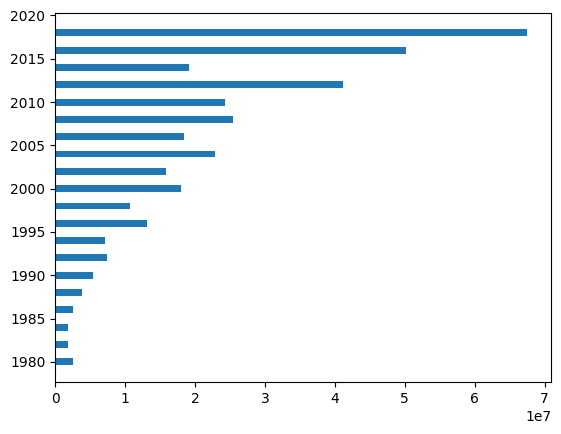

In [5]:
#importing matplot lib to make the bar chart to visualize the donation.
import matplotlib.pyplot as plt
plt.barh(range(1980,2019,2), myresults)

## 4

In [6]:
# Define a function that reads donation data for year
# and returns the total amount donated from each state during that year

In [7]:
def mydonations (myyear: int) -> int:
    """
    The mydonations function takes a year as the input, and returns the amount of money donated from each state during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the amount of money donated from each state during that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont" + str(myyear) + ".txt", header=None, sep='|', usecols=[9,14], encoding='Windows-1252')
    myDF.columns = ["STATE", "TRANSACTION_AMT"]
    myvalue = myDF.groupby('STATE')['TRANSACTION_AMT'].sum()
    return myvalue

In [8]:
#to print how much money was donated from each state during the 1990 election.
import pandas as pd
mydonations(1990)

STATE
AK      601719
AL     4718757
AR     2380273
AS       10556
AZ     3082578
CA    43448729
CO     4482980
CT     6709767
DC    12943744
DE     1279905
FL    16688314
GA     6096551
GU        7995
HI     2557691
IA     3065919
ID      797140
IL    15264140
IN     5440484
KS     1825688
KY     4329631
LA     4763249
MA    10545757
MD     7066463
ME     1196380
MI     9035329
MN     5122643
MO     4676598
MS     2120024
MT      863468
NC     6010731
ND      262860
NE     2237154
NH     1882440
NJ    12411921
NM     1331478
NV     2132465
NY    34188115
OH     7667303
OK     2987993
OR     2462299
PA    11210499
PR      364479
RI     2029927
SC     1963972
SD      799218
TN     3451220
TX    26221487
UT      973959
VA     8744373
VI       58622
VT      397781
WA     2934344
WI     2760674
WV     1214006
WY      503158
XX        2000
ZZ      210160
Name: TRANSACTION_AMT, dtype: int64

In [9]:
#to get the result in a list in a series of donation totals per state 
myresults = list(map(mydonations, range(1980,2019,2)))

In [10]:
#can get result of money donation from each state.
#using concat we can add up the amount of doantion in each state all year.
pd.concat(myresults, axis=1).sum(axis=1)

STATE
01         1814.0
AK     61180328.0
AL    271578030.0
AR    235648443.0
AS       384227.0
         ...     
SR          210.0
SY           40.0
TW           50.0
U*          195.0
VD          225.0
Length: 267, dtype: float64

<BarContainer object of 10 artists>

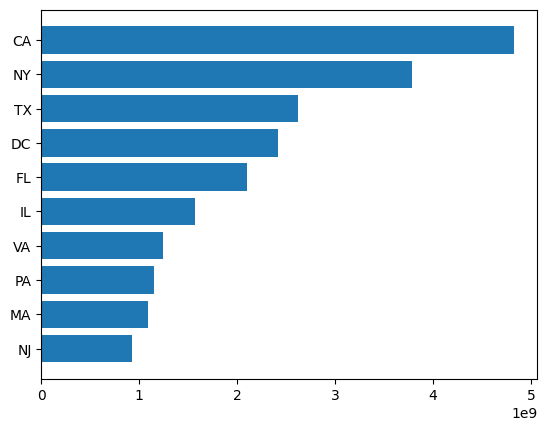

In [11]:
# Sort the states by total donation amount in ascending order 
# and take the top 10 to create bar chart

mycounts = pd.concat(myresults, axis=1).sum(axis=1).sort_values().tail(10)

import matplotlib.pyplot as plt
plt.barh(mycounts.index, mycounts)

## 5

In [12]:
#definong the funtion which returns total amount spent per day

def myfares (mymonth: str) -> float:
    """
    The myfares function takes a 2-character month as the input (in quotation marks, with a leading 0 if needed), and returns the amount of money spent on each day during that month

    Args:
    mymonth (str): This is a 2-character month (as a string) as the input

    Returns:
    mytable (float): This is the amount of money (as a floating point number) spent on each day during that month
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_2018-" + mymonth + ".csv", usecols=[1,16])
    myDF['mydate'] = pd.to_datetime(myDF['tpep_pickup_datetime']).dt.strftime("%Y-%m-%d")
    mytable = myDF.groupby('mydate')['total_amount'].sum()
    return mytable

In [13]:
#imporitng pandas and checking the above funtion to see how much money waa spent in january till 2018
import pandas as pd
myfares("01")

mydate
2001-01-05          8.80
2002-12-31         43.26
2003-01-01        165.42
2008-12-31        323.40
2009-01-01        272.49
2017-01-02          2.90
2017-01-03          2.50
2017-12-31       3482.43
2018-01-01    3851903.00
2018-01-02    3733876.40
2018-01-03    4116953.89
2018-01-04    1760411.53
2018-01-05    4045099.72
2018-01-06    4178978.92
2018-01-07    3635668.78
2018-01-08    4285478.73
2018-01-09    4570982.06
2018-01-10    4627360.44
2018-01-11    4977450.01
2018-01-12    5097276.07
2018-01-13    4706551.09
2018-01-14    4237738.74
2018-01-15    3806294.95
2018-01-16    4738687.24
2018-01-17    4658825.15
2018-01-18    5170510.73
2018-01-19    5086014.55
2018-01-20    4367669.50
2018-01-21    3900908.03
2018-01-22    4078434.18
2018-01-23    4415845.88
2018-01-24    4889477.13
2018-01-25    5275927.59
2018-01-26    5274787.90
2018-01-27    4503028.01
2018-01-28    4041012.46
2018-01-29    4227184.11
2018-01-30    4556711.22
2018-01-31    4876567.84
2018-02-01       1

In [15]:
#getting a list of 12 months and printing the result on each month & collect daily results.
mymonths = [str(i).zfill(2) for i in range(1,13)]
myresults = list(map(myfares, mymonths))

In [16]:
#Combining all monthly results into a single table
# also filtering the data to include dates and avoide overlapping
mycounts = pd.concat(myresults, axis=1).sum(axis=1)
betterdates = mycounts[pd.to_datetime(mycounts.index).strftime("%Y") == "2018"]

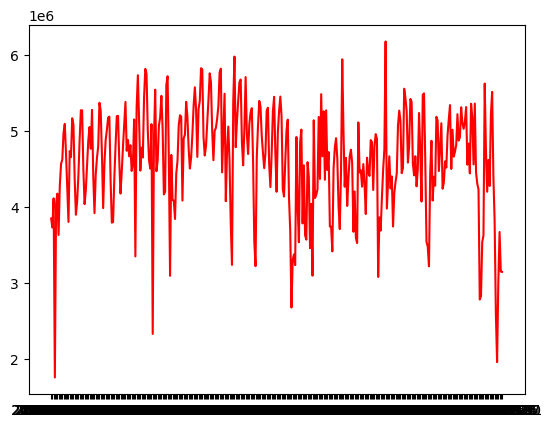

In [18]:
#generating the graph using matplotlib library
import matplotlib.pyplot as plt
plt.plot(betterdates.index, betterdates, color='red')